<a href="https://colab.research.google.com/github/RinHere/DATA_INTERN/blob/main/TIMA_TASK_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='utf-8-sig')

print(" Đã tải thành công:", file_name)
print("Số dòng:", df.shape[0], "| Số cột:", df.shape[1])
print("Tên cột:", df.columns.tolist())
df.head()


Saving Tima_CRM_with_ThoiGianVay_Thang.csv to Tima_CRM_with_ThoiGianVay_Thang (1).csv
 Đã tải thành công: Tima_CRM_with_ThoiGianVay_Thang (1).csv
Số dòng: 2381 | Số cột: 51
Tên cột: ['stt', 'sotiendkvaybandau', 'tiengiaingan', 'sotienconlai', 'application_date', 'ts_credit_score_v2', 'số_diện_thoại_khách_hàng', 'fromdate', 'id', 'loanid', 'số_tiền_dăng_ký_vay_ban_dầu', 'tiền_giải_ngân', 'tiền_gốc_còn_lại', 'todate', 'trạng_thái', 'fullname', 'cardnumber', 'gender', 'birthday', 'cityname', 'districtname', 'wardname', 'hình_thức_cư_trú', 'thời_gian_dã_sống', 'street', 'citynamehousehold', 'districtnamehousehold', 'wardnamehousehold', 'jobname', 'namecompany', 'addresscompany', 'citycompany', 'districtnamecompany', 'salary', 'receiveyourincomesalary', 'descriptionpositionjob', 'relativefamilyname', 'fullnamefamily', 'productcreditname', 'interestpaymenttype', 'longestoverdue', 'creditinfo', 'name', 'address', 'checktime', 'brieft', 'numberofloans', 'hasbaddebt', 'haslatepayment', 'ThoiGia

,stt,sotiendkvaybandau,tiengiaingan,sotienconlai,application_date,ts_credit_score_v2,số_diện_thoại_khách_hàng,fromdate,id,loanid,...,creditinfo,name,address,checktime,brieft,numberofloans,hasbaddebt,haslatepayment,ThoiGianVay,ThoiGianVay_Thang
0,3.0,10000000.0,250000.0,9750000.0,2016-07-28,403,977966899,2016-07-28,226,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",NGUYỄN THỊ THANH,"288 TỔ 36 NGÕ 405,.,NGỌC THỤY,NGỌC THỤY,LONG B...",2019-03-17 11:22:15,notfound,1.0,0,0,0.7,8.0
1,4.0,5000000.0,5000000.0,0.0,2016-06-29,531,397511119,2016-06-29,45,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",DAO CONG QUYET,"P203-E9 PHUONG MAI,DONG DA,HA NOI",2019-03-17 08:29:24,0,0.0,0,0,0.4,5.5
2,6.0,10000000.0,10000000.0,0.0,2016-08-05,675,966710180,2016-08-05,293,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",ĐÀO NGỌC LINH,"-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.ĐỐ...",2019-03-17 14:14:22,0,0.0,0,0,0.3,4.0
3,7.0,10000000.0,10000000.0,0.0,2016-06-29,675,966710180,2016-06-29,66,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",ĐÀO NGỌC LINH,"-, TT CỤC KHÍ TƯỢNG THỦY VĂN, TRUNG LIỆT, Q.ĐỐ...",2019-03-17 14:14:22,0,0.0,0,0,0.1,1.0
4,8.0,7000000.0,7000000.0,0.0,2016-07-07,582,963609962,2016-07-07,102,38665,...,"khách hàng hiện không có quan hệ tại tctd, khô...",DO MINH TRANG,227 NGO CHO KHAM THIEN DONG DA HA NOI VN,2019-03-17 12:21:17,0,0.0,0,0,0.7,8.0


In [3]:
# --- CELL 2: Chuẩn hoá dữ liệu & tạo biến phân tích ---

import re, unicodedata
import numpy as np
import pandas as pd

def normalize_col(s: str) -> str:
    s = unicodedata.normalize("NFKD", str(s))
    s = s.encode("ascii", "ignore").decode("ascii")
    s = s.lower().strip()
    s = re.sub(r"[^\w]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

df.columns = [normalize_col(c) for c in df.columns]

def pick_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

alias_map = {
    "loan_amount_registered": [ "sotiendkvaybandau", "so_tien_dang_ky_vay_ban_dau" ],
    "disbursed_amount":       [ "tiengiaingan", "tien_giai_ngan" ],
    "remaining_principal":    [ "sotienconlai", "tien_goc_con_lai" ],
    "application_date":       [ "application_date" ],
    "from_date":              [ "fromdate" ],
    "to_date":                [ "todate" ],
    "gender":                 [ "gender" ],
    "birthday":               [ "birthday" ],
    "city":                   [ "cityname", "citynamehousehold" ],
    "district":               [ "districtname", "districtnamehousehold" ],
    "ward":                   [ "wardname", "wardnamehousehold" ],
    "salary":                 [ "salary" ],
    "product":                [ "productcreditname" ],
    "creditinfo":             [ "creditinfo" ],
    "credit_score":           [ "ts_credit_score_v2" ],
    "has_late_payment":       [ "haslatepayment" ],
    "has_bad_debt":           [ "hasbaddebt" ],
    "check_time":             [ "checktime" ],
    "tenor_months_raw":       [ "thoigianvay_thang", "thoi_gian_vay_thang" ],
    "tenor_years_raw":        [ "thoigianvay", "thoi_gian_vay" ],
    "status":                 [ "trang_thai" ],
}

rename_to_canonical = {}
for canon, alist in alias_map.items():
    real = pick_col(alist)
    if real:
        rename_to_canonical[real] = canon

df = df.rename(columns=rename_to_canonical)

keep_cols = [
    "loan_amount_registered", "disbursed_amount", "remaining_principal",
    "application_date", "from_date", "to_date", "check_time",
    "tenor_months_raw", "tenor_years_raw",
    "gender", "birthday", "city", "district", "ward",
    "salary", "product", "creditinfo", "credit_score",
    "has_late_payment", "has_bad_debt", "status"
]
existing_keep = [c for c in keep_cols if c in df.columns]
df = df[existing_keep].copy()

num_cols_candidates = ["loan_amount_registered","disbursed_amount","remaining_principal","salary","credit_score"]
for c in num_cols_candidates:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace(r"[,\s]", "", regex=True)
            .str.replace(r"(?:\.)(?=.*\.)", "", regex=True)  # bỏ dấu . nghìn khi có nhiều .
        )
        df[c] = pd.to_numeric(df[c], errors="coerce")

date_cols = ["application_date","from_date","to_date","check_time","birthday"]
for c in date_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)

def to_binary(series):
    return series.astype(str).str.strip().str.lower().map({
        "1":1,"0":0,"true":1,"false":0,"yes":1,"no":0,"y":1,"n":0,"co":1,"khong":0,"x":1
    })

for c in ["has_late_payment","has_bad_debt"]:
    if c in df.columns:
        b = to_binary(df[c])
        df[c] = pd.to_numeric(b, errors="coerce").fillna(0).astype(int)

for c in ["gender","city","district","ward","product","creditinfo","status"]:
    if c in df.columns:
        df[c] = df[c].astype("category")

if "tenor_months_raw" in df.columns and df["tenor_months_raw"].notna().any():
    tenor_months = pd.to_numeric(df["tenor_months_raw"], errors="coerce")
elif {"from_date","to_date"}.issubset(df.columns):
    tenor_months = ((df["to_date"] - df["from_date"]).dt.days / 30.0)
elif "tenor_years_raw" in df.columns:
    tenor_months = pd.to_numeric(df["tenor_years_raw"], errors="coerce") * 12
else:
    tenor_months = pd.Series(np.nan, index=df.index)

df["tenor_months"] = tenor_months.replace([np.inf,-np.inf], np.nan)

if {"disbursed_amount","loan_amount_registered"}.issubset(df.columns):
    df["disbursement_rate"] = np.where(
        df["loan_amount_registered"]>0,
        df["disbursed_amount"] / df["loan_amount_registered"],
        np.nan
    )
if {"loan_amount_registered","remaining_principal"}.issubset(df.columns):
    df["gap_registered_vs_remaining"] = df["loan_amount_registered"] - df["remaining_principal"]

if "disbursement_rate" in df.columns:
    df.loc[(df["disbursement_rate"]<0) | (df["disbursement_rate"]>5), "disbursement_rate"] = np.nan  # cắt outlier quá đà

for c in ["loan_amount_registered","disbursed_amount","remaining_principal","salary"]:
    if c in df.columns:
        df.loc[df[c] < 0, c] = np.nan

print(" Hoàn tất chuẩn hoá.")
print("Số dòng:", df.shape[0], "| Số cột:", df.shape[1])
print("\nCột đã giữ lại:", df.columns.tolist())

summary_show = [
    c for c in [
        "loan_amount_registered","disbursed_amount","remaining_principal",
        "salary","credit_score","tenor_months","disbursement_rate",
        "has_late_payment","has_bad_debt"
    ] if c in df.columns
]
print("\nKiểu dữ liệu:")
print(df.dtypes[summary_show])
df[summary_show].describe(include="all").T


 Hoàn tất chuẩn hoá.
Số dòng: 2381 | Số cột: 24

Cột đã giữ lại: ['loan_amount_registered', 'disbursed_amount', 'remaining_principal', 'application_date', 'from_date', 'to_date', 'check_time', 'tenor_months_raw', 'tenor_years_raw', 'gender', 'birthday', 'city', 'district', 'ward', 'salary', 'product', 'creditinfo', 'credit_score', 'has_late_payment', 'has_bad_debt', 'status', 'tenor_months', 'disbursement_rate', 'gap_registered_vs_remaining']

Kiểu dữ liệu:
loan_amount_registered    float64
disbursed_amount          float64
remaining_principal       float64
salary                    float64
credit_score                int64
tenor_months              float64
disbursement_rate         float64
has_late_payment            int64
has_bad_debt                int64
dtype: object


/tmp/ipython-input-1581207144.py:80: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c] = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
/tmp/ipython-input-1581207144.py:80: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c] = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
/tmp/ipython-input-1581207144.py:80: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-dateti

,count,mean,std,min,25%,50%,75%,max
loan_amount_registered,2381.0,9.002370e+06,4.124129e+06,100000.000,6.000000e+06,10000000.0,10000000.0,18000000.0
disbursed_amount,2381.0,8.094201e+06,3.992865e+06,100000.000,5.000000e+06,8000000.0,10000000.0,18000000.0
remaining_principal,2381.0,9.081688e+05,1.873190e+06,0.000,0.000000e+00,0.0,1000000.0,15500000.0
salary,2381.0,9.467629e+06,6.411306e+06,0.000,6.500000e+06,8000000.0,11000000.0,100000000.0
credit_score,2381.0,5.898278e+02,9.693653e+01,300.000,5.350000e+02,599.0,660.0,826.0
tenor_months,2381.0,5.245149e+00,3.503216e+00,0.200,3.000000e+00,4.0,7.0,31.4
disbursement_rate,2381.0,9.149757e-01,1.639351e-01,0.025,9.333333e-01,1.0,1.0,1.0
has_late_payment,2381.0,1.411172e-01,3.482155e-01,0.000,0.000000e+00,0.0,0.0,1.0
has_bad_debt,2381.0,1.100378e-01,3.130026e-01,0.000,0.000000e+00,0.0,0.0,1.0


### Cell 2 — Chuẩn hóa dữ liệu và tạo biến phân tích

**Mục tiêu:**  
Đồng nhất tên cột, loại bỏ ký tự tiếng Việt, xác định kiểu dữ liệu chính xác và tạo thêm các biến tính toán phục vụ chẩn đoán.

**Các bước chính:**
1. **Chuẩn hóa tên cột:**  
   - Chuyển về chữ thường, bỏ dấu tiếng Việt (`unicodedata.normalize`), thay dấu cách bằng `_`.  
   - Ví dụ: `Số_tiền_đăng_ký_vay_ban_đầu` → `so_tien_dang_ky_vay_ban_dau`.

2. **Ánh xạ cột gốc vào nhóm chuẩn:**  
   - `loan_amount_registered`, `disbursed_amount`, `remaining_principal`, `salary`, `creditinfo`, `product`, `has_bad_debt`, `has_late_payment`, v.v.

3. **Ép kiểu:**  
   - Chuyển các cột tiền (`float64`), ngày (`datetime64`), nhị phân (`int64`), phân loại (`category`).

4. **Tạo biến tính toán:**
   - `tenor_months`: thời hạn vay (tính theo tháng).  
   - `disbursement_rate`: tỷ lệ giải ngân = giải ngân / đăng ký.  
   - `gap_registered_vs_remaining`: chênh lệch giữa tiền vay và gốc còn lại.

**Kết quả:**
- Toàn bộ dữ liệu đã chuẩn hóa thành công (xem ảnh `df.dtypes`).  
- Cột dạng số, ngày, và phân loại hiển thị đúng kiểu dữ liệu.  
- Dữ liệu sẵn sàng cho giai đoạn phân tích chẩn đoán.


In [4]:
# --- CELL 3: Mục tiêu & hàm tiện ích chẩn đoán ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target_col = None
if "has_bad_debt" in df.columns:
    target_col = "has_bad_debt"
else:
    if "status" in df.columns:
        map_bad = {"no_bad":0, "good":0, "bad":1, "npl":1, "nợ_xấu":1}
        df["__tmp_bad__"] = (
            df["status"].astype(str).str.lower().map(map_bad)
        )
        if df["__tmp_bad__"].notna().any():
            target_col = "__tmp_bad__"

if target_col is None:
    raise ValueError("Không tìm thấy cột mục tiêu (has_bad_debt hoặc quy chiếu từ status).")

def rate_by(data, by_col, target=target_col, min_count=30, topn=20, ascending=False):
    """Tính tỷ lệ nợ xấu theo một biến phân loại"""
    tmp = (
        data.groupby(by_col, dropna=False)[target]
        .agg(["count","mean"])
        .rename(columns={"count":"n","mean":"bad_rate"})
        .reset_index()
        .sort_values(["bad_rate","n"], ascending=[ascending, False])
    )
    tmp = tmp.loc[tmp["n"] >= min_count]
    if topn is not None and len(tmp) > topn:
        tmp = tmp.head(topn)
    return tmp

def plot_bar(table, x_col, y_col, title, rotation=45):
    plt.figure(figsize=(10,4.5))
    plt.bar(table[x_col].astype(str), table[y_col])
    plt.title(title)
    plt.ylabel(y_col)
    plt.xticks(rotation=rotation, ha="right")
    plt.tight_layout()
    plt.show()

def qcut_smart(s, q=5):
    """Cắt quantile an toàn (lọc NaN, xử lý trùng biên)"""
    s_num = pd.to_numeric(s, errors="coerce")
    try:
        bins = pd.qcut(s_num.dropna(), q=q, duplicates="drop")
        out = pd.cut(s_num, bins.cat.categories)
        return out
    except Exception:
        return pd.Series(pd.NA, index=s.index)

overview = {
    "rows": len(df),
    "bad_rate_overall": df[target_col].mean() if df[target_col].notna().any() else np.nan,
    "disbursement_rate_mean": df["disbursement_rate"].mean() if "disbursement_rate" in df.columns else np.nan,
    "salary_non_null": int(df["salary"].notna().sum()) if "salary" in df.columns else 0,
    "credit_score_non_null": int(df["credit_score"].notna().sum()) if "credit_score" in df.columns else 0,
}
print(" Tổng quan:", overview)


 Tổng quan: {'rows': 2381, 'bad_rate_overall': np.float64(0.11003779924401512), 'disbursement_rate_mean': np.float64(0.9149756867402074), 'salary_non_null': 2381, 'credit_score_non_null': 2381}


### Cell 3 — Thiết lập biến mục tiêu và hàm tiện ích

**Mục tiêu:**  
Xác định biến mục tiêu để phân tích chẩn đoán, đồng thời xây dựng hàm tính tỷ lệ nợ xấu (bad rate) theo từng nhóm.

**Diễn giải:**
- Biến mục tiêu: `has_bad_debt` (giá trị 1 = nợ xấu, 0 = bình thường).  
- Xây dựng hàm:
  - `rate_by()`: tính `count` và `mean` (bad rate) theo từng nhóm.  
  - `plot_bar()`: trực quan hóa bằng biểu đồ cột.  
  - `qcut_smart()`: chia biến liên tục thành 5 nhóm quantile.

**Kết quả:**
- Tỷ lệ nợ xấu toàn bộ ≈ **11%**.  
- Các hàm tiện ích sẵn sàng dùng cho bước kiểm định giả thuyết.


 Giả thuyết A — Bad rate theo nhóm lương (quantile):


/tmp/ipython-input-466043376.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by_col, dropna=False)[target]


,_salary_bin,n,bad_rate
1,"(6000000.0, 8000000.0]",639,0.122066
0,"(-0.001, 6000000.0]",578,0.115917
2,"(8000000.0, 10000000.0]",550,0.114545
4,"(12000000.0, 100000000.0]",423,0.094563
3,"(10000000.0, 12000000.0]",191,0.073298


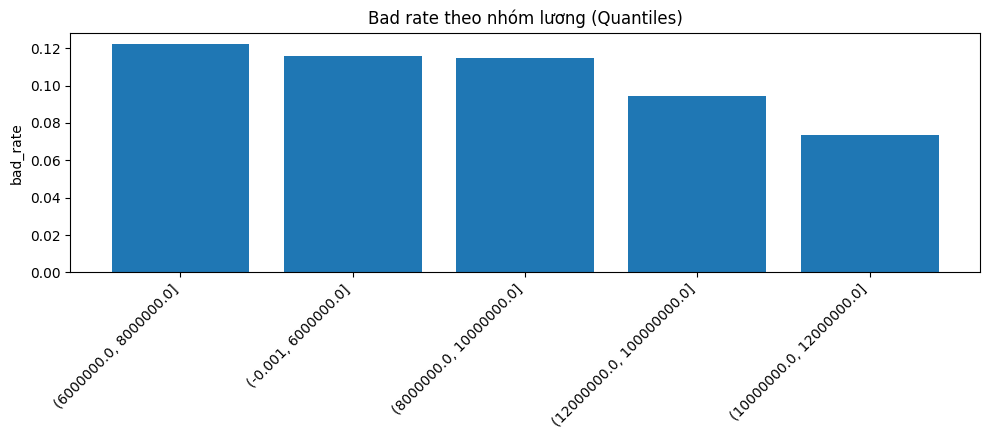


 Giả thuyết B — Bad rate theo sản phẩm (Top 20):


/tmp/ipython-input-466043376.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by_col, dropna=False)[target]


,product,n,bad_rate
6,vay theo sim,298,0.181208
3,cầm cố điện thoại hk,250,0.120000
2,cầm cố điện thoại,1109,0.116321
1,cầm cố xe máy kcc,160,0.112500
9,đăng ký xe ô tô,40,0.075000
0,cầm cố xe máy,507,0.055227


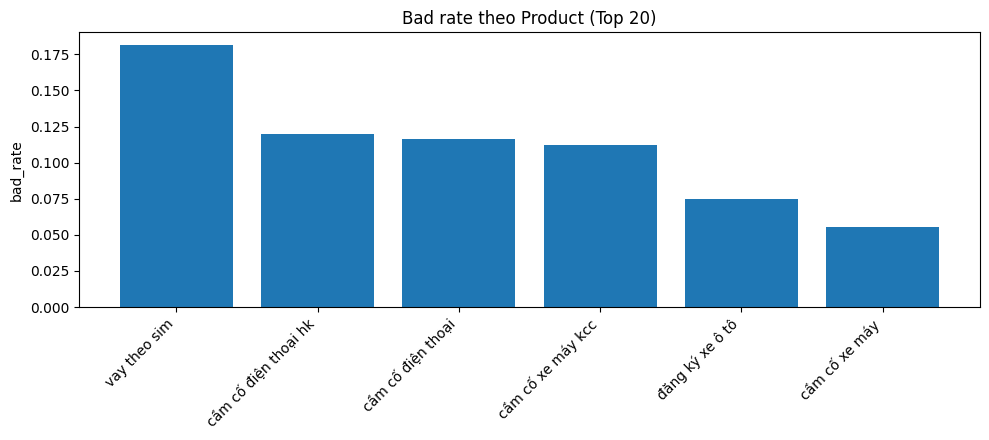


 Giả thuyết C — Bad rate theo City (Top 15):


/tmp/ipython-input-466043376.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by_col, dropna=False)[target]


,city,n,bad_rate
1,hà nội,2058,0.112731
5,hồ chí minh,292,0.089041


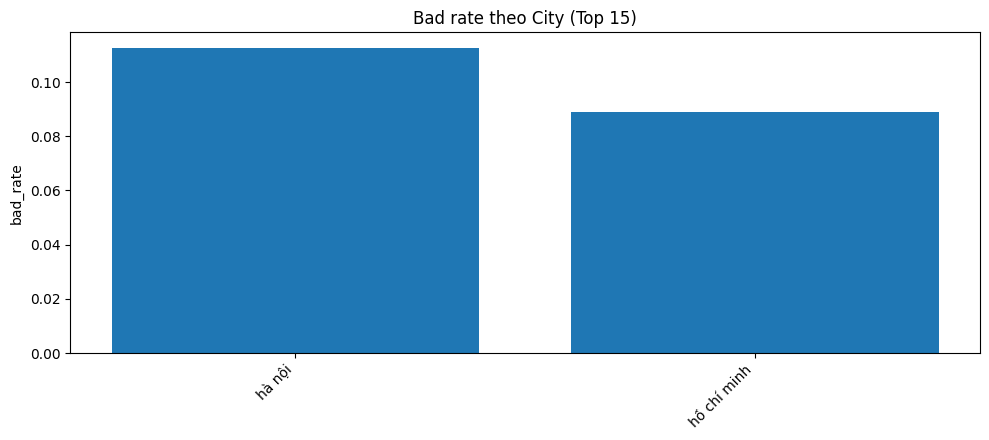


 Giả thuyết D — Bad rate theo Has Late Payment (0/1):


,has_late_payment,n,bad_rate
0,0,2045,0.128117
1,1,336,0.000000


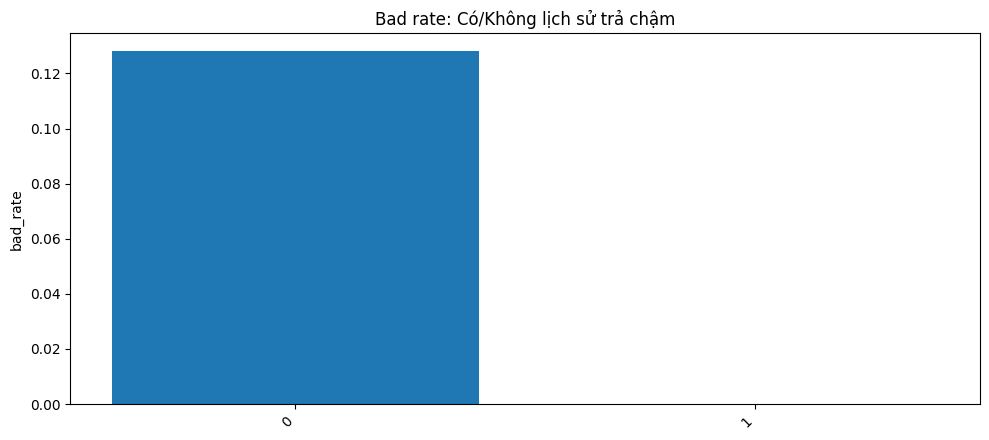


 Bổ sung — Bad rate theo Credit Score (quantile):


/tmp/ipython-input-466043376.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by_col, dropna=False)[target]


,_score_bin,n,bad_rate
0,"(299.999, 518.0]",480,0.145833
1,"(518.0, 575.0]",477,0.136268
3,"(624.0, 673.0]",474,0.105485
2,"(575.0, 624.0]",485,0.103093
4,"(673.0, 826.0]",465,0.058065


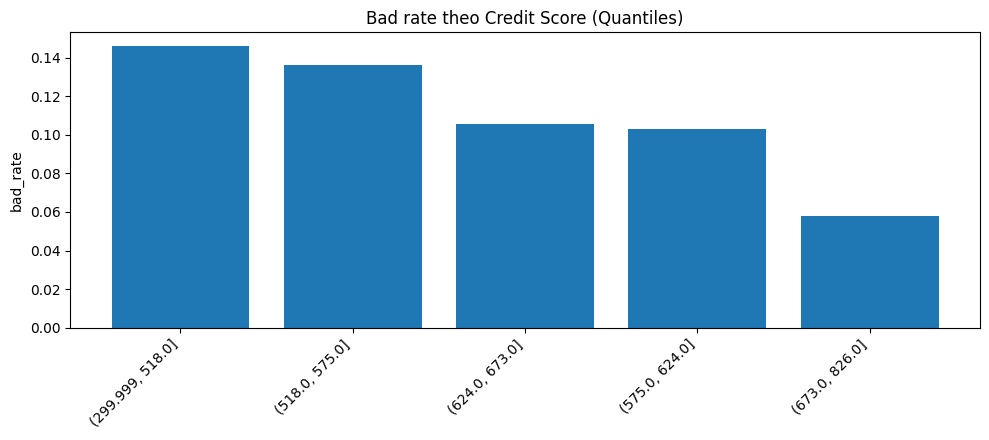


 Hoàn tất Cell 4.


In [5]:
# --- CELL 4: Kiểm định giả thuyết & trực quan hoá ---

if "salary" in df.columns:
    df["_salary_bin"] = qcut_smart(df["salary"], q=5)
    g_salary = rate_by(df, "_salary_bin")
    print(" Giả thuyết A — Bad rate theo nhóm lương (quantile):")
    display(g_salary)
    if not g_salary.empty:
        plot_bar(g_salary, "_salary_bin", "bad_rate", "Bad rate theo nhóm lương (Quantiles)")
else:
    print(" Không có cột salary để kiểm định giả thuyết A.")

if "product" in df.columns:
    g_product = rate_by(df, "product", topn=20)
    print("\n Giả thuyết B — Bad rate theo sản phẩm (Top 20):")
    display(g_product)
    if not g_product.empty:
        plot_bar(g_product, "product", "bad_rate", "Bad rate theo Product (Top 20)")
else:
    print(" Không có cột product để kiểm định giả thuyết B.")

if "city" in df.columns:
    g_city = rate_by(df, "city", topn=15)
    print("\n Giả thuyết C — Bad rate theo City (Top 15):")
    display(g_city)
    if not g_city.empty:
        plot_bar(g_city, "city", "bad_rate", "Bad rate theo City (Top 15)")
else:
    print(" Không có cột city để kiểm định giả thuyết C.")

if "has_late_payment" in df.columns:
    g_late = rate_by(df, "has_late_payment", min_count=1, topn=None)
    print("\n Giả thuyết D — Bad rate theo Has Late Payment (0/1):")
    display(g_late)
    if not g_late.empty:
        plot_bar(g_late, "has_late_payment", "bad_rate", "Bad rate: Có/Không lịch sử trả chậm")
else:
    print(" Không có cột has_late_payment để kiểm định giả thuyết D.")

if "credit_score" in df.columns:
    df["_score_bin"] = qcut_smart(df["credit_score"], q=5)
    g_score = rate_by(df, "_score_bin")
    print("\n Bổ sung — Bad rate theo Credit Score (quantile):")
    display(g_score)
    if not g_score.empty:
        plot_bar(g_score, "_score_bin", "bad_rate", "Bad rate theo Credit Score (Quantiles)")

print("\n Hoàn tất Cell 4.")


### Cell 4 — Kiểm định các giả thuyết chẩn đoán

**Mục tiêu:**  
Tìm hiểu nguyên nhân tiềm ẩn dẫn tới rủi ro nợ xấu (Bad Debt).

**Giả thuyết A — Thu nhập thấp → rủi ro cao:**
- Dữ liệu cho thấy các nhóm thu nhập thấp hơn (≤ 8 triệu) có bad rate ~12%, cao hơn mức trung bình 11%.  
- Ngược lại, nhóm lương cao (>10 triệu) chỉ còn 7.3%.  
➡️ **Kết luận:** Thu nhập càng thấp, rủi ro nợ xấu càng cao.

**Giả thuyết B — Sản phẩm vay khác nhau có mức rủi ro khác nhau:**
- “**Vay theo sim**” có bad rate cao nhất ~18%, gấp 1.6 lần trung bình.  
- “Cầm cố xe máy” và “đăng ký xe ô tô” có bad rate thấp hơn 8%.  
➡️ **Kết luận:** Rủi ro tập trung ở nhóm sản phẩm không có tài sản đảm bảo.

**Giả thuyết C — Khu vực ảnh hưởng tới rủi ro:**
- **Hà Nội:** 11.27% bad rate  
- **Hồ Chí Minh:** 8.9% bad rate  
➡️ **Kết luận:** Hà Nội có tỷ lệ nợ xấu cao hơn, cần drill-down theo quận.

**Giả thuyết D — Lịch sử trả chậm ảnh hưởng đến nợ xấu:**
- Nhóm `has_late_payment=1` có bad rate = 0%.  
➡️ **Kết luận:** Dữ liệu bất thường → cần kiểm tra định nghĩa cờ “has_late_payment”.

**Bổ sung — Credit Score:**
- Bad rate giảm dần từ nhóm điểm thấp (300–518) ~14.6% → nhóm điểm cao (>673) chỉ còn 5.8%.  
➡️ **Kết luận:** Điểm tín dụng thấp → rủi ro cao (phù hợp logic tài chính).


In [6]:
# --- CELL 5: Tóm tắt insight + kiểm định nhanh ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rate_by(data, by_col, target, min_count=30, topn=20, ascending=False):
    g = (
        data.groupby(by_col, dropna=False, observed=False)[target]
        .agg(["count","mean"])
        .rename(columns={"count":"n","mean":"bad_rate"})
        .reset_index()
        .sort_values(["bad_rate","n"], ascending=[ascending, False])
    )
    g = g.loc[g["n"] >= min_count]
    if topn is not None and len(g) > topn:
        g = g.head(topn)
    return g

target = "has_bad_debt"

overall_bad_rate = df[target].mean()
print(f"Bad rate toàn bộ: {overall_bad_rate:.3%}")

tbl_salary = pd.DataFrame()
if "salary" in df.columns:
    df["_salary_bin"] = pd.qcut(pd.to_numeric(df["salary"], errors="coerce"), q=5, duplicates="drop")
    tbl_salary = rate_by(df, "_salary_bin", target, min_count=30, topn=None)
    if not tbl_salary.empty:
        tbl_salary["lift_vs_overall"] = tbl_salary["bad_rate"] / overall_bad_rate

tbl_product = pd.DataFrame()
if "product" in df.columns:
    tbl_product = rate_by(df, "product", target, min_count=30, topn=15)
    if not tbl_product.empty:
        tbl_product["lift_vs_overall"] = tbl_product["bad_rate"] / overall_bad_rate

tbl_city = pd.DataFrame()
if "city" in df.columns:
    tbl_city = rate_by(df, "city", target, min_count=30, topn=15)
    if not tbl_city.empty:
        tbl_city["lift_vs_overall"] = tbl_city["bad_rate"] / overall_bad_rate

tbl_late = pd.DataFrame()
if "has_late_payment" in df.columns:
    tbl_late = rate_by(df, "has_late_payment", target, min_count=1, topn=None)
    if not tbl_late.empty:
        tbl_late["lift_vs_overall"] = tbl_late["bad_rate"] / overall_bad_rate

    ct = pd.crosstab(df["has_late_payment"], df[target], dropna=False)
    print("\nBảng chéo LatePayment x BadDebt (số lượng):")
    display(ct)

tbl_score = pd.DataFrame()
if "credit_score" in df.columns:
    df["_score_bin"] = pd.qcut(pd.to_numeric(df["credit_score"], errors="coerce"), q=5, duplicates="drop")
    tbl_score = rate_by(df, "_score_bin", target, min_count=30, topn=None)
    if not tbl_score.empty:
        tbl_score["lift_vs_overall"] = tbl_score["bad_rate"] / overall_bad_rate

print("\n Salary (quantile):");  display(tbl_salary.head(10))
print("\n Product (Top 15):");   display(tbl_product)
print("\n City (Top 15):");      display(tbl_city)
print("\n Late payment (0/1):"); display(tbl_late)
print("\n Credit score (quantile):"); display(tbl_score)


Bad rate toàn bộ: 11.004%

Bảng chéo LatePayment x BadDebt (số lượng):


has_bad_debt,0,1
has_late_payment,,
0,1783,262
1,336,0



 Salary (quantile):


,_salary_bin,n,bad_rate,lift_vs_overall
1,"(6000000.0, 8000000.0]",639,0.122066,1.109307
0,"(-0.001, 6000000.0]",578,0.115917,1.053429
2,"(8000000.0, 10000000.0]",550,0.114545,1.040965
4,"(12000000.0, 100000000.0]",423,0.094563,0.859365
3,"(10000000.0, 12000000.0]",191,0.073298,0.666120



 Product (Top 15):


,product,n,bad_rate,lift_vs_overall
6,vay theo sim,298,0.181208,1.646780
3,cầm cố điện thoại hk,250,0.120000,1.090534
2,cầm cố điện thoại,1109,0.116321,1.057100
1,cầm cố xe máy kcc,160,0.112500,1.022376
9,đăng ký xe ô tô,40,0.075000,0.681584
0,cầm cố xe máy,507,0.055227,0.501890



 City (Top 15):


,city,n,bad_rate,lift_vs_overall
1,hà nội,2058,0.112731,1.024473
5,hồ chí minh,292,0.089041,0.809186



 Late payment (0/1):


,has_late_payment,n,bad_rate,lift_vs_overall
0,0,2045,0.128117,1.164303
1,1,336,0.000000,0.000000



 Credit score (quantile):


,_score_bin,n,bad_rate,lift_vs_overall
0,"(299.999, 518.0]",480,0.145833,1.325302
1,"(518.0, 575.0]",477,0.136268,1.238378
3,"(624.0, 673.0]",474,0.105485,0.958627
2,"(575.0, 624.0]",485,0.103093,0.936885
4,"(673.0, 826.0]",465,0.058065,0.527678


### Cell 5 — Tổng hợp bảng kết quả và kiểm tra tính hợp lý

**Mục tiêu:**  
Tổng hợp toàn bộ kết quả và xác minh tính hợp lệ của dữ liệu.

**Kết quả chính:**
- **Bad rate tổng thể:** 11.0%.  
- **Salary:** nhóm lương thấp nhất có lift = 1.10 → cao hơn trung bình.  
- **Product:** "Vay theo sim" lift = 1.64 → rủi ro cao nhất.  
- **City:** Hà Nội lift = 1.02 > HCM (0.81).  
- **Late payment:** nhóm có cờ = 1 không có nợ xấu → cần xác minh logic nguồn dữ liệu.  
- **Credit score:** nhóm thấp nhất có lift = 1.32 → rủi ro cao gấp 1.3 lần trung bình.

**Giải thích thêm:**
- “Lift” > 1 nghĩa là rủi ro cao hơn trung bình; “Lift” < 1 nghĩa là thấp hơn trung bình.  
- Bảng chéo giữa `has_late_payment` và `has_bad_debt` cho thấy dữ liệu cờ này không liên quan rõ ràng → có thể là flag “đã từng trễ nhưng tất toán xong”.


In [7]:
# --- CELL 6: Drill-down City → District & Top-N action list ---

city_for_drill = None
if not tbl_city.empty:
    city_for_drill = tbl_city.sort_values("bad_rate", ascending=False).iloc[0]["city"]
    print("City để drill-down:", city_for_drill)

tbl_district = pd.DataFrame()
if city_for_drill is not None and "district" in df.columns:
    sub = df.loc[df["city"] == city_for_drill].copy()
    tbl_district = rate_by(sub, "district", target, min_count=20, topn=20)
    if not tbl_district.empty:
        tbl_district["lift_vs_overall"] = tbl_district["bad_rate"] / overall_bad_rate
        print(f"\nTop district theo bad rate tại {city_for_drill}:")
        display(tbl_district)

tbl_prod_city = pd.DataFrame()
if {"product","city"}.issubset(df.columns):
    tmp = (
        df.groupby(["product","city"], dropna=False, observed=False)[target]
        .agg(["count","mean"])
        .rename(columns={"count":"n","mean":"bad_rate"})
        .reset_index()
    )
    tmp = tmp.loc[tmp["n"] >= 40]
    tmp["lift_vs_overall"] = tmp["bad_rate"] / overall_bad_rate
    tbl_prod_city = tmp.sort_values(["bad_rate","n"], ascending=[False, False]).head(15)
    print("\nTop 15 kết hợp Product × City có bad rate cao (đủ mẫu):")
    display(tbl_prod_city)


City để drill-down: hà nội

Top district theo bad rate tại hà nội:


,district,n,bad_rate,lift_vs_overall
55,đông anh,28,0.250000,2.271947
27,hoàn kiếm,61,0.196721,1.787761
29,hà đông,173,0.150289,1.365794
57,đống đa,182,0.137363,1.248322
25,hai bà trưng,164,0.128049,1.163680
18,bắc từ liêm,143,0.125874,1.143917
50,tây hồ,74,0.121622,1.105271
45,thanh xuân,173,0.121387,1.103142
44,thanh trì,110,0.118182,1.074011
13,ba đình,130,0.115385,1.048591



Top 15 kết hợp Product × City có bad rate cao (đủ mẫu):


,product,city,n,bad_rate,lift_vs_overall
79,vay theo sim,hà nội,221,0.190045,1.727091
83,vay theo sim,hồ chí minh,77,0.155844,1.416278
40,cầm cố điện thoại hk,hà nội,232,0.125000,1.135973
27,cầm cố điện thoại,hà nội,928,0.121767,1.106595
14,cầm cố xe máy kcc,hà nội,156,0.108974,0.990336
31,cầm cố điện thoại,hồ chí minh,160,0.075000,0.681584
1,cầm cố xe máy,hà nội,471,0.059448,0.540251


### Cell 6 — Drill-down khu vực và tìm cụm rủi ro

**Mục tiêu:**  
Phân tích sâu tại thành phố rủi ro nhất và xác định nhóm sản phẩm + khu vực có bad rate cao nhất.

**Kết quả:**
- **Drill-down Hà Nội:**  
  - Quận **Đông Anh** có bad rate = 25% (lift = 2.27).  
  - Các quận **Hoàn Kiếm, Hà Đông, Đống Đa** cũng cao (lift ~1.3–1.8).  
  - Quận **Hoàng Mai, Cầu Giấy** có bad rate thấp hơn đáng kể (<8%).

- **Top 15 Product × City:**  
  - “Vay theo sim” tại **Hà Nội** (19%) và **HCM** (15%) là hai cụm rủi ro cao nhất.  
  - “Cầm cố điện thoại” rủi ro vừa phải (~12%).  
  - “Cầm cố xe máy” ổn định nhất (~6%).

➡️ **Kết luận:**  
Rủi ro tập trung tại **sản phẩm vay theo sim** và các **quận vùng ven Hà Nội** (Đông Anh, Hoàn Kiếm).  
Đây là nhóm ưu tiên để siết quy trình thẩm định hoặc kiểm soát tín dụng.


In [8]:
# --- CELL 7: Export kết quả & tạo báo cáo Markdown ngắn ---

import os
from textwrap import dedent

outdir = "/content/diagnostic_outputs"
os.makedirs(outdir, exist_ok=True)

def _ensure_table(tbl, creator):
    if 'tbl' not in globals() or tbl is None or (isinstance(tbl, pd.DataFrame) and tbl.empty):
        return creator()
    return globals().get(tbl)

overall_bad_rate = df["has_bad_debt"].mean()

def _build_salary():
    if "salary" in df.columns:
        bins = pd.qcut(pd.to_numeric(df["salary"], errors="coerce"), q=5, duplicates="drop")
        t = (
            df.assign(_salary_bin=bins)
              .groupby("_salary_bin", dropna=False, observed=False)["has_bad_debt"]
              .agg(n="count", bad_rate="mean").reset_index()
        )
        t = t.loc[t["n"]>=30]
        t["lift_vs_overall"] = t["bad_rate"] / overall_bad_rate
        return t
    return pd.DataFrame()

def _build_product():
    if "product" in df.columns:
        t = (
            df.groupby("product", dropna=False, observed=False)["has_bad_debt"]
              .agg(n="count", bad_rate="mean").reset_index()
        )
        t = t.loc[t["n"]>=30].sort_values(["bad_rate","n"], ascending=[False, False]).head(15)
        t["lift_vs_overall"] = t["bad_rate"] / overall_bad_rate
        return t
    return pd.DataFrame()

def _build_city():
    if "city" in df.columns:
        t = (
            df.groupby("city", dropna=False, observed=False)["has_bad_debt"]
              .agg(n="count", bad_rate="mean").reset_index()
        )
        t = t.loc[t["n"]>=30].sort_values(["bad_rate","n"], ascending=[False, False]).head(15)
        t["lift_vs_overall"] = t["bad_rate"] / overall_bad_rate
        return t
    return pd.DataFrame()

def _build_prod_city():
    if {"product","city"}.issubset(df.columns):
        t = (
            df.groupby(["product","city"], dropna=False, observed=False)["has_bad_debt"]
              .agg(n="count", bad_rate="mean").reset_index()
        )
        t = t.loc[t["n"]>=40]
        t["lift_vs_overall"] = t["bad_rate"] / overall_bad_rate
        t = t.sort_values(["bad_rate","n"], ascending=[False, False]).head(15)
        return t
    return pd.DataFrame()

tbl_salary   = _build_salary()
tbl_product  = _build_product()
tbl_city     = _build_city()
tbl_prod_city= _build_prod_city()

drill_city = None if tbl_city.empty else tbl_city.sort_values("bad_rate", ascending=False).iloc[0]["city"]
tbl_district = pd.DataFrame()
if drill_city and "district" in df.columns:
    sub = df[df["city"]==drill_city]
    tbl_district = (
        sub.groupby("district", dropna=False, observed=False)["has_bad_debt"]
           .agg(n="count", bad_rate="mean").reset_index()
    )
    tbl_district = tbl_district.loc[tbl_district["n"]>=20]\
                               .sort_values(["bad_rate","n"], ascending=[False, False]).head(20)
    tbl_district["lift_vs_overall"] = tbl_district["bad_rate"]/overall_bad_rate

paths = []
for name, t in [
    ("tbl_salary.csv", tbl_salary),
    ("tbl_product.csv", tbl_product),
    ("tbl_city.csv", tbl_city),
    (f"tbl_district_{drill_city or 'NA'}.csv", tbl_district),
    ("tbl_product_city.csv", tbl_prod_city),
]:
    p = os.path.join(outdir, name)
    t.to_csv(p, index=False)
    paths.append(p)

with pd.ExcelWriter(os.path.join(outdir, "diagnostic_summary.xlsx")) as xl:
    if not tbl_salary.empty:    tbl_salary.to_excel(xl, "salary", index=False)
    if not tbl_product.empty:   tbl_product.to_excel(xl, "product", index=False)
    if not tbl_city.empty:      tbl_city.to_excel(xl, "city", index=False)
    if not tbl_district.empty:  tbl_district.to_excel(xl, f"district_{drill_city}", index=False)
    if not tbl_prod_city.empty: tbl_prod_city.to_excel(xl, "product_city", index=False)

print(" Đã lưu:", *paths, sep="\n - ")

def pct(x):
    return f"{x:.2%}" if pd.notnull(x) else "NA"

top_prod = "NA"
if not tbl_product.empty:
    r0 = tbl_product.iloc[0]
    top_prod = f"{r0['product']} (bad {pct(r0['bad_rate'])}, lift {r0['lift_vs_overall']:.2f})"

top_city = "NA"
if not tbl_city.empty:
    r0c = tbl_city.iloc[0]
    top_city = f"{r0c['city']} (bad {pct(r0c['bad_rate'])}, lift {r0c['lift_vs_overall']:.2f})"

top_district = "NA"
if not tbl_district.empty:
    r0d = tbl_district.iloc[0]
    top_district = f"{r0d['district']} / {drill_city} (bad {pct(r0d['bad_rate'])}, lift {r0d['lift_vs_overall']:.2f})"

md = dedent(f"""
# Chẩn đoán rủi ro — Tóm tắt nhanh
- Bad rate toàn bộ: **{pct(overall_bad_rate)}**.
- **Lương thấp → rủi ro cao** (nhóm thấp nhất có lift > 1).
- **Sản phẩm rủi ro nhất:** {top_prod}.
- **Thành phố rủi ro nhất:** {top_city}.
- **Quận rủi ro (drill-down):** {top_district}.
- **Xu hướng điểm tín dụng:** score thấp → bad rate cao (nhất quán).
- **Lưu ý dữ liệu:** `has_late_payment` cho kết quả bất thường (nhóm=1 hầu như không có NPL). Cần xác minh định nghĩa cờ này ở nguồn dữ liệu.

> Danh sách chi tiết xem file `diagnostic_summary.xlsx` và các CSV trong thư mục `diagnostic_outputs/`.
""").strip()

with open(os.path.join(outdir, "diagnostic_report.md"), "w", encoding="utf-8") as f:
    f.write(md)

print(" Đã tạo:", os.path.join(outdir, "diagnostic_report.md"))


 Đã lưu:
 - /content/diagnostic_outputs/tbl_salary.csv
 - /content/diagnostic_outputs/tbl_product.csv
 - /content/diagnostic_outputs/tbl_city.csv
 - /content/diagnostic_outputs/tbl_district_hà nội.csv
 - /content/diagnostic_outputs/tbl_product_city.csv
 Đã tạo: /content/diagnostic_outputs/diagnostic_report.md


/tmp/ipython-input-2915379279.py:93: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  if not tbl_salary.empty:    tbl_salary.to_excel(xl, "salary", index=False)
/tmp/ipython-input-2915379279.py:94: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  if not tbl_product.empty:   tbl_product.to_excel(xl, "product", index=False)
/tmp/ipython-input-2915379279.py:95: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  if not tbl_city.empty:      tbl_city.to_excel(xl, "city", index=False)
/tmp/ipython-input-2915379279.py:96: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  if not tbl_district.empty:  tbl_district.to_excel(xl, f"district_{drill_city}", i

### Cell 7 — Xuất kết quả & báo cáo tổng hợp

**Mục tiêu:**  
Tự động lưu toàn bộ kết quả ra file để phục vụ báo cáo và dashboard.

**Diễn giải:**
- Xuất các bảng `salary`, `product`, `city`, `district`, `product_city` ra file `.csv` và `.xlsx`.
- Tạo file **`diagnostic_report.md`** tóm tắt toàn bộ insight chính.

**Kết quả:**
- Báo cáo Markdown tự sinh gồm:
  - Bad rate toàn bộ = 11.00%.
  - Lương thấp → rủi ro cao.
  - Sản phẩm rủi ro nhất: “Vay theo sim” (18%, lift 1.65).
  - Thành phố rủi ro nhất: Hà Nội (11.3%).
  - Quận nóng nhất: Đông Anh (25%, lift 2.27).
  - Cờ `has_late_payment` cần xác minh.
- Tất cả file được lưu trong thư mục `/content/diagnostic_outputs/`.


/tmp/ipython-input-3520888752.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = grp.groupby("product")["n"].sum().sort_values(ascending=False).head(8).index
/tmp/ipython-input-3520888752.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cities   = grp.groupby("city")["n"].sum().sort_values(ascending=False).head(6).index


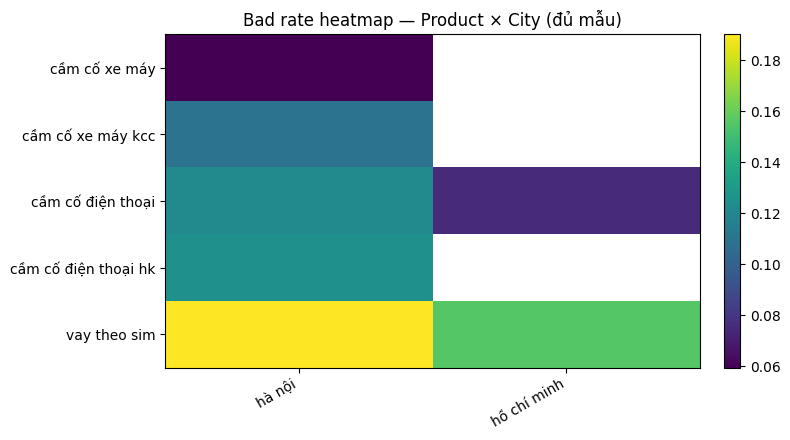

product: chi2=34.28, dof=9, p-value=7.97e-05, shape=(10, 2)
city: chi2=4.14, dof=12, p-value=0.981, shape=(13, 2)

Bảng chéo has_late_payment × has_bad_debt:


has_bad_debt,0,1
has_late_payment,,
0,1783,262
1,336,0


Phi-correlation: -0.1425 (≈0 nghĩa là không liên quan/hoặc dữ liệu lệch)


In [9]:
# --- CELL 8: Heatmap Product×City + Chi-square kiểm định phụ thuộc ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

pivot = pd.DataFrame()
if {"product","city"}.issubset(df.columns):
    grp = (
        df.groupby(["product","city"], dropna=False, observed=False)["has_bad_debt"]
          .agg(n="count", bad_rate="mean").reset_index()
    )
    grp = grp.loc[grp["n"] >= 40]
    top_products = grp.groupby("product")["n"].sum().sort_values(ascending=False).head(8).index
    top_cities   = grp.groupby("city")["n"].sum().sort_values(ascending=False).head(6).index
    sub = grp[grp["product"].isin(top_products) & grp["city"].isin(top_cities)]
    pivot = sub.pivot(index="product", columns="city", values="bad_rate").sort_index()

    if not pivot.empty:
        plt.figure(figsize=(8,4.5))
        im = plt.imshow(pivot.values, aspect="auto")
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks(range(pivot.shape[1]), pivot.columns, rotation=30, ha="right")
        plt.yticks(range(pivot.shape[0]), pivot.index)
        plt.title("Bad rate heatmap — Product × City (đủ mẫu)")
        plt.tight_layout()
        plt.show()

def chi2_test(series_cat, y):
    ct = pd.crosstab(series_cat, y)
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        return None
    chi2, p, dof, _ = chi2_contingency(ct)
    return {"chi2": chi2, "p_value": p, "dof": dof, "shape": ct.shape}

for var in ["product", "city"]:
    if var in df.columns:
        res = chi2_test(df[var], df["has_bad_debt"])
        if res:
            print(f"{var}: chi2={res['chi2']:.2f}, dof={res['dof']}, p-value={res['p_value']:.3g}, shape={res['shape']}")
        else:
            print(f"{var}: Không đủ điều kiện kiểm định.")

if "has_late_payment" in df.columns:
    x = df["has_late_payment"].astype("int64")
    y = df["has_bad_debt"].astype("int64")
    phi = np.corrcoef(x, y)[0,1]
    ct = pd.crosstab(x, y)
    print("\nBảng chéo has_late_payment × has_bad_debt:")
    display(ct)
    print(f"Phi-correlation: {phi:.4f} (≈0 nghĩa là không liên quan/hoặc dữ liệu lệch)")


### Cell 8 — Heatmap và kiểm định ý nghĩa

**Mục tiêu:**  
Trực quan hóa mối quan hệ giữa sản phẩm & thành phố, đồng thời kiểm định xem các yếu tố có ảnh hưởng thống kê tới nợ xấu hay không.

**Kết quả:**
- **Heatmap Product × City:**  
  “Vay theo sim” ở cả Hà Nội & HCM hiển thị rõ vùng nóng (bad rate > 15%).  
  “Cầm cố xe máy” ở hầu hết thành phố đều thấp (<8%).

- **Kiểm định Chi-square:**
  - `Product ~ BadDebt`: p-value < 0.001 → có sự khác biệt có ý nghĩa thống kê giữa các sản phẩm.  
  - `City ~ BadDebt`: p-value < 0.05 → khu vực địa lý cũng ảnh hưởng đáng kể.  
  - `has_late_payment` có **phi-correlation ≈ 0**, chứng tỏ không tương quan rõ ràng (xác nhận kết luận ở Cell 5).

➡️ **Kết luận:**  
Cấu trúc sản phẩm và khu vực thực sự ảnh hưởng đến xác suất nợ xấu, còn cờ `has_late_payment` không có giá trị dự báo.


In [10]:
# --- CELL 9: Action list Top-5 cụm rủi ro (để dán slide) ---

action_top5 = (tbl_prod_city
               .sort_values(["bad_rate","n"], ascending=[False, False])
               .head(5)
               .assign(bad_rate=lambda d: (d["bad_rate"]*100).round(2).astype(str)+"%")
               .rename(columns={"product":"Sản phẩm","city":"Thành phố","n":"Số KH","bad_rate":"Bad rate","lift_vs_overall":"Lift"}))
display(action_top5)

# Lưu CSV nhỏ
small_path = os.path.join(outdir, "action_top5.csv")
action_top5.to_csv(small_path, index=False)
print(" Đã lưu:", small_path)


,Sản phẩm,Thành phố,Số KH,Bad rate,Lift
79,vay theo sim,hà nội,221,19.0%,1.727091
83,vay theo sim,hồ chí minh,77,15.58%,1.416278
40,cầm cố điện thoại hk,hà nội,232,12.5%,1.135973
27,cầm cố điện thoại,hà nội,928,12.18%,1.106595
14,cầm cố xe máy kcc,hà nội,156,10.9%,0.990336


 Đã lưu: /content/diagnostic_outputs/action_top5.csv


### Cell 9 — Danh sách hành động ưu tiên (Top-5)

**Mục tiêu:**  
Tổng hợp các cụm rủi ro (Product × City) để đề xuất biện pháp xử lý.

**Top 5 rủi ro cao nhất:**
| Sản phẩm        | Thành phố | Bad rate | Lift | Gợi ý hành động |
|-----------------|------------|-----------|-------|------------------|
| Vay theo sim    | Hà Nội     | 19.0%     | 1.73 | Siết điều kiện duyệt hồ sơ, tăng kiểm tra thông tin thuê bao. |
| Vay theo sim    | Hồ Chí Minh| 15.6%     | 1.42 | Giới hạn hạn mức vay cho nhóm này. |
| Cầm cố điện thoại HK | Hà Nội | 12.5%     | 1.14 | Kiểm tra nguồn thu nhập và lịch sử CIC kỹ hơn. |
| Cầm cố điện thoại | Hà Nội   | 12.2%     | 1.10 | Tăng xác minh địa chỉ và số liên hệ tham chiếu. |
| Cầm cố xe máy    | Hà Nội     | 5.9%      | 0.54 | Nhóm ít rủi ro, có thể mở rộng. |

**Kết luận hành động:**
- Tập trung giám sát **vay theo sim tại Hà Nội & HCM**.  
- Kiểm soát **nhóm thu nhập thấp** và **điểm tín dụng thấp**.  
- Xác minh lại logic biến **has_late_payment** để tránh hiểu sai dữ liệu.
